In [ ]:
import pandas as pd
from scipy.io import arff
data = arff.loadarff('/content/year.arff')
df = pd.DataFrame(data[0])

*  The dataset contains financial information about companies that were studied for 1 year. After 1 year, manyof them survived, but a few of them went bankrupt.



In [ ]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,b'0'
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,b'0'
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,b'0'
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,b'0'
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,b'0'


In [ ]:
df.shape

(5910, 65)

Converting the type of target variable to integer

In [ ]:
df['class'].value_counts()

b'0'    5500
b'1'     410
Name: class, dtype: int64

In [ ]:
df['class'] = df['class'].astype(int)

In [ ]:
df['class'].value_counts()

0    5500
1     410
Name: class, dtype: int64

Handling missing values.

*  here, missing values are replaces with the mean value of the column


In [ ]:
df.isna().sum()

Attr1       3
Attr2       3
Attr3       3
Attr4      21
Attr5      11
         ... 
Attr61     15
Attr62      0
Attr63     21
Attr64    107
class       0
Length: 65, dtype: int64

In [ ]:
df.mean()

Attr1      -0.022347
Attr2       0.465086
Attr3       0.189155
Attr4       4.892476
Attr5      19.406758
             ...    
Attr61     10.941497
Attr62    241.978184
Attr63      9.127741
Attr64     65.276716
class       0.069374
Length: 65, dtype: float64

In [ ]:
df.fillna(value = df.mean(), inplace = True)

In [ ]:
df.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   5910 non-null   float64
 1   Attr2   5910 non-null   float64
 2   Attr3   5910 non-null   float64
 3   Attr4   5910 non-null   float64
 4   Attr5   5910 non-null   float64
 5   Attr6   5910 non-null   float64
 6   Attr7   5910 non-null   float64
 7   Attr8   5910 non-null   float64
 8   Attr9   5910 non-null   float64
 9   Attr10  5910 non-null   float64
 10  Attr11  5910 non-null   float64
 11  Attr12  5910 non-null   float64
 12  Attr13  5910 non-null   float64
 13  Attr14  5910 non-null   float64
 14  Attr15  5910 non-null   float64
 15  Attr16  5910 non-null   float64
 16  Attr17  5910 non-null   float64
 17  Attr18  5910 non-null   float64
 18  Attr19  5910 non-null   float64
 19  Attr20  5910 non-null   float64
 20  Attr21  5910 non-null   float64
 21  Attr22  5910 non-null   float64
 22  

Feature Selection

*   as the dataset contains 64 features. Training on such high dimentional feature set would result in low interpretability of the result



In [ ]:
features = df.drop('class', axis = 1)

<Axes: >

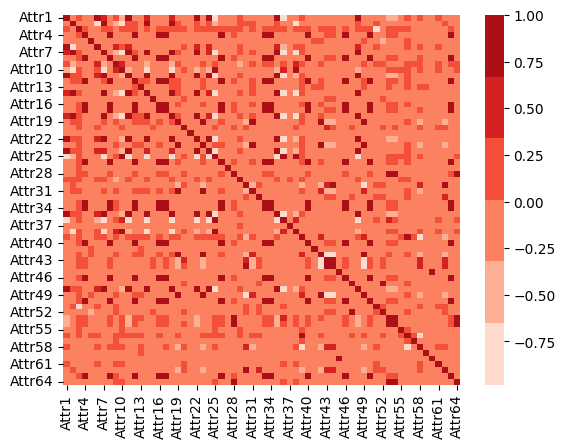

In [ ]:
import seaborn as sns
cor = features.corr()
color = sns.color_palette("Reds")
sns.heatmap(cor, cmap = color)

In [ ]:
cor

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr55,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64
Attr1,1.000000,-0.192969,0.055964,0.000903,0.000198,0.727370,0.520071,0.000584,0.095136,-0.433635,...,0.004482,0.011558,0.002738,0.011704,0.000694,0.000254,0.009739,-0.002090,0.001324,-0.173136
Attr2,-0.192969,1.000000,-0.099898,-0.002658,-0.001352,-0.709909,0.716802,-0.003701,-0.495885,-0.796110,...,-0.010130,-0.015680,-0.001836,-0.098119,0.000963,0.000187,-0.074872,0.011968,-0.003677,0.001098
Attr3,0.055964,-0.099898,1.000000,0.021429,0.004879,0.007278,0.102217,0.017484,-0.144775,0.127972,...,0.059162,0.054312,0.008222,-0.059738,-0.004326,-0.000410,-0.059806,-0.065365,0.024470,0.001984
Attr4,0.000903,-0.002658,0.021429,1.000000,0.002202,-0.000549,0.001188,0.905787,-0.011183,0.002896,...,-0.000227,-0.002525,0.001134,-0.001916,-0.001963,-0.000241,-0.003771,-0.001625,0.967649,0.001346
Attr5,0.000198,-0.001352,0.004879,0.002202,1.000000,0.000239,0.000230,0.004463,-0.040174,0.001746,...,0.002096,0.011181,0.000360,-0.010729,-0.000547,0.000053,-0.002602,-0.045057,0.000568,-0.000255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Attr60,0.000254,0.000187,-0.000410,-0.000241,0.000053,-0.000100,0.000365,-0.000246,-0.003072,-0.000216,...,-0.001595,0.000758,0.000347,-0.000601,-0.000652,1.000000,-0.002852,-0.000083,-0.000541,-0.000360
Attr61,0.009739,-0.074872,-0.059806,-0.003771,-0.002602,0.049353,-0.069018,-0.003624,0.150896,0.056581,...,-0.013172,-0.007911,0.001117,0.013346,0.000982,-0.002852,1.000000,-0.004096,0.005850,-0.002028
Attr62,-0.002090,0.011968,-0.065365,-0.001625,-0.045057,-0.006882,-0.001153,-0.001472,-0.022288,-0.012623,...,-0.008999,-0.161767,-0.000591,0.288514,-0.000666,-0.000083,-0.004096,1.000000,-0.002883,-0.000843
Attr63,0.001324,-0.003677,0.024470,0.967649,0.000568,-0.000088,0.001360,0.865117,0.019123,0.003909,...,-0.000685,0.004444,0.001879,-0.008730,-0.001790,-0.000541,0.005850,-0.002883,1.000000,0.001620




*   keeping only 1 of the many highly correlated features




In [ ]:
correlation_matrix = features.corr()
threshold = 0.8
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            correlated_features.add(correlation_matrix.columns[i])
df.drop(correlated_features, axis=1, inplace=True)


In [ ]:
df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr9,Attr13,Attr15,...,Attr42,Attr43,Attr45,Attr47,Attr52,Attr55,Attr57,Attr59,Attr61,class
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,1.0881,0.096885,1475.20,...,0.095457,127.30,0.452890,54.621,0.42557,15182.0000,0.275430,0.002024,4.7343,0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.2757,0.037544,3693.40,...,0.001011,171.38,-0.029614,58.258,0.29604,2341.8000,-0.012035,0.152220,3.2749,0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,1.1415,0.165680,431.75,...,0.129100,163.71,1.013700,47.382,0.22371,33401.0000,0.192290,0.000000,2.9870,0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,1.2754,0.084038,3020.50,...,0.000000,157.30,-0.539690,82.073,0.69565,2789.6000,-0.796020,2.878700,3.3302,0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,1.5150,0.055575,2386.10,...,0.044632,125.21,0.321770,46.538,0.37618,1.2437,0.107160,0.139380,4.0950,0




*  Reduced the feature space from 64 to 31 while keeping the variance (information)



In [ ]:
df.shape

(5910, 31)

Preparation for Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
x = df.drop('class', axis = 1)
y = df['class']

In [ ]:
# standardizing the data
ss = StandardScaler()
x_norm = ss.fit_transform(x)

In [ ]:
print(x_norm.std())

1.0


With Class Imbalance

In [ ]:
# logistic regression
kfold = KFold(n_splits= 5, random_state = 42, shuffle = True)
acc_score = []

for train_indices, test_indices in kfold.split(x_norm):

    X_train, X_test = x_norm[train_indices], x_norm[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9204737732656514, 0.934010152284264, 0.928087986463621, 0.9314720812182741, 0.9306260575296108]
Average accuracy: 0.9289340101522843


In [ ]:
# svm (linear kernel)
acc_score = []

for train_indices, test_indices in kfold.split(x_norm):

    X_train, X_test = x_norm[train_indices], x_norm[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    model = svm.SVC(kernel = 'linear')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9230118443316413, 0.934010152284264, 0.9306260575296108, 0.9323181049069373, 0.9314720812182741]
Average accuracy: 0.9302876480541455


In [ ]:
# svm (rbf kernel)
acc_score = []

for train_indices, test_indices in kfold.split(x_norm):

    X_train, X_test = x_norm[train_indices], x_norm[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    model = svm.SVC(kernel = 'rbf')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9263959390862944, 0.9365482233502538, 0.9306260575296108, 0.9314720812182741, 0.9306260575296108]
Average accuracy: 0.9311336717428087


In [ ]:
# Decision Tree
acc_score = []

for train_indices, test_indices in kfold.split(x_norm):

    X_train, X_test = x_norm[train_indices], x_norm[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    model = DecisionTreeClassifier(max_leaf_nodes = 100)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9365482233502538, 0.9526226734348562, 0.9441624365482234, 0.9407783417935702, 0.9416243654822335]
Average accuracy: 0.9431472081218274


In [ ]:
# Random Forest
acc_score = []

for train_indices, test_indices in kfold.split(x_norm):

    X_train, X_test = x_norm[train_indices], x_norm[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    model = RandomForestClassifier(max_leaf_nodes = 100, n_estimators = 100)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9416243654822335, 0.9534686971235194, 0.9467005076142132, 0.9560067681895094, 0.9534686971235194]
Average accuracy: 0.950253807106599


With Class Imbalance, the model performance worsens in some validation folds

Handling Class Imbalance

(1) Using 410 non- bankrupt companies (Under-Sampling)

In [ ]:
df['class'].value_counts()

0    5500
1     410
Name: class, dtype: int64

In [ ]:
df_1 = df[df['class'] == 1]
df_0 = df[df['class'] == 0]

df_0_minus = df_0.iloc[:410,:]

minus_df = pd.concat([df_1, df_0_minus], axis=0)

# Shuffle the rows
shuffled_df = minus_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df = pd.DataFrame(shuffled_df)

In [ ]:
shuffled_df.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr9,Attr13,Attr15,...,Attr42,Attr43,Attr45,Attr47,Attr52,Attr55,Attr57,Attr59,Attr61,class
0,0.050289,0.927620,0.047533,1.05120,-38.251,-0.10358,0.050370,2.88360,0.020979,5596.80,...,0.017503,122.580,0.145860,44.4680,0.327790,107.80,0.694820,0.000000,4.6239,0
1,-0.008047,0.070891,0.932710,57.75100,66.963,0.00000,-0.008047,4.54840,0.017217,330.41,...,0.016299,20.726,66.633356,0.0000,0.003231,12820.00,-0.008661,0.000000,17.6110,1
2,-0.012325,0.747150,-0.057263,0.78347,-91.762,0.00000,-0.012325,0.79078,0.143800,2398.20,...,-0.004967,94.979,-0.095721,55.4010,0.311760,-140.41,-0.048759,0.000000,10.2670,1
3,0.174440,0.549060,0.280100,1.55000,-10.833,0.60280,0.217750,1.05060,0.055486,827.86,...,0.047129,55.366,0.791980,19.3590,0.122640,49626.00,0.386840,0.088172,9.8811,0
4,-3.046300,6.906900,-5.997000,0.13174,-137.270,-3.73760,-3.046300,13.47700,-0.224120,-834.66,...,-0.201860,23.994,-19.589000,3.5008,0.426000,-2047.40,0.515870,0.000000,18.4510,1


In [ ]:
shuffled_df['class'].value_counts()

0    410
1    410
Name: class, dtype: int64

In [ ]:
xm = shuffled_df.drop('class', axis = 1)
ym = shuffled_df['class']

In [ ]:
ssm = StandardScaler()
xm_norm = ssm.fit_transform(xm)

In [ ]:
print(xm_norm.std())

1.0


In [ ]:
# logistic regression
kfold = KFold(n_splits= 5, random_state = 42, shuffle = True)
acc_score = []

for train_indices, test_indices in kfold.split(xm_norm):

    X_train, X_test = xm_norm[train_indices], xm_norm[test_indices]
    y_train, y_test = ym.iloc[train_indices], ym.iloc[test_indices]

    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.774390243902439, 0.75, 0.7621951219512195, 0.823170731707317, 0.7134146341463414]
Average accuracy: 0.7646341463414634


In [ ]:
# svm (linear kernel)
acc_score = []

for train_indices, test_indices in kfold.split(xm_norm):

    X_train, X_test = xm_norm[train_indices], xm_norm[test_indices]
    y_train, y_test = ym.iloc[train_indices], ym.iloc[test_indices]

    model = svm.SVC(kernel = 'linear')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.774390243902439, 0.7439024390243902, 0.774390243902439, 0.8292682926829268, 0.6951219512195121]
Average accuracy: 0.7634146341463415


In [ ]:
# svm (rbf kernel)
acc_score = []

for train_indices, test_indices in kfold.split(xm_norm):

    X_train, X_test = xm_norm[train_indices], xm_norm[test_indices]
    y_train, y_test = ym.iloc[train_indices], ym.iloc[test_indices]

    model = svm.SVC(kernel = 'rbf')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.7804878048780488, 0.8414634146341463, 0.7621951219512195, 0.7987804878048781, 0.7621951219512195]
Average accuracy: 0.7890243902439025


In [ ]:
# Decision Tree
acc_score = []

for train_indices, test_indices in kfold.split(xm_norm):

    X_train, X_test = xm_norm[train_indices], xm_norm[test_indices]
    y_train, y_test = ym.iloc[train_indices], ym.iloc[test_indices]

    model = DecisionTreeClassifier(max_leaf_nodes = 2)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.7073170731707317, 0.7987804878048781, 0.725609756097561, 0.7378048780487805, 0.676829268292683]
Average accuracy: 0.7292682926829268


In [ ]:
# Random Forest
acc_score = []

for train_indices, test_indices in kfold.split(xm_norm):

    X_train, X_test = xm_norm[train_indices], xm_norm[test_indices]
    y_train, y_test = ym.iloc[train_indices], ym.iloc[test_indices]

    model = RandomForestClassifier(max_leaf_nodes = 100, n_estimators = 200)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.8780487804878049, 0.8536585365853658, 0.8109756097560976, 0.9085365853658537, 0.8536585365853658]
Average accuracy: 0.8609756097560977




*   in this method of handling class imbalance, the accuracies are generally low because we are training on much less data points



(2) Using SMOTE, training with 5500 bankruped companies (Over-sampling)



In [ ]:
df['class'].value_counts()

0    5500
1     410
Name: class, dtype: int64

In [ ]:
print(x.shape)
print(len(y))

(5910, 30)
5910


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
xs, ys = smote.fit_resample(x, y)

In [ ]:
print(xs.shape)
print(len(ys))

(11000, 30)
11000


In [ ]:
ys.value_counts()

0    5500
1    5500
Name: class, dtype: int64

In [ ]:
sss = StandardScaler()
xs_norm = sss.fit_transform(xs)

In [ ]:
# Logistic Regression
kfold = KFold(n_splits= 5, random_state = 42, shuffle = True)
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model = LogisticRegression(max_iter = 1000)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.775, 0.7668181818181818, 0.759090909090909, 0.7613636363636364, 0.7618181818181818]
Average accuracy: 0.7648181818181817


In [ ]:
# SVM (Linear kernel)
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model = svm.SVC(kernel = 'linear')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.785, 0.7777272727272727, 0.7622727272727273, 0.7663636363636364, 0.7695454545454545]
Average accuracy: 0.7721818181818183


In [ ]:
# SVM (Radial Basis Function kernel)
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model = svm.SVC(kernel = 'rbf')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.7968181818181819, 0.7877272727272727, 0.7795454545454545, 0.7845454545454545, 0.7831818181818182]
Average accuracy: 0.7863636363636364


In [ ]:
# SVM (Sigmoid kernel)
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model = svm.SVC(kernel = 'sigmoid', C = 1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.7463636363636363, 0.7368181818181818, 0.7, 0.7227272727272728, 0.6968181818181818]
Average accuracy: 0.7205454545454545


In [ ]:
# Decision Tree
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model = DecisionTreeClassifier(max_leaf_nodes = 300)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9304545454545454, 0.9168181818181819, 0.9218181818181819, 0.9086363636363637, 0.9236363636363636]
Average accuracy: 0.9202727272727274


In [ ]:
import xgboost as xgb

THIS IS THE BEST MODEL

In [ ]:
# Extreme Gradient Boosting
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model_xgb = xgb.XGBClassifier(n_estimators = 200, reg_lambda = 10, max_leaves = 1, max_depth = 10)
    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9777272727272728, 0.9745454545454545, 0.9768181818181818, 0.9727272727272728, 0.9781818181818182]
Average accuracy: 0.976


In [ ]:
# XGBoost
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model_xgb = xgb.XGBClassifier(n_estimators = 200, reg_lambda = 20, max_leaves = 5, max_depth = 50)
    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9777272727272728, 0.9713636363636363, 0.9754545454545455, 0.9690909090909091, 0.9740909090909091]
Average accuracy: 0.9735454545454546


In [ ]:
# Random Forest
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model = RandomForestClassifier(max_leaf_nodes = 500)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9763636363636363, 0.9686363636363636, 0.97, 0.9704545454545455, 0.9659090909090909]
Average accuracy: 0.9702727272727273


Extracting the features that were most important while prediction

In [ ]:
feature_importances = model.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

most_important_features = [xs.columns[i] for i in sorted_indices]

print(most_important_features)

['Attr27', 'Attr39', 'Attr42', 'Attr13', 'Attr6', 'Attr41', 'Attr15', 'Attr55', 'Attr1', 'Attr7', 'Attr29', 'Attr37', 'Attr21', 'Attr45', 'Attr61', 'Attr19', 'Attr2', 'Attr9', 'Attr28', 'Attr59', 'Attr3', 'Attr4', 'Attr30', 'Attr57', 'Attr5', 'Attr20', 'Attr43', 'Attr32', 'Attr47', 'Attr52']


Upon decoding the actual names of the features, the top 10 most important features for predicting the chances of bankruptcy of a company are as follows:-

1.   Profit on (operating activities / financial expences)
2.   Profit on sales
3.   Profit on (Operating Activities / sales)
4.   (Gross profit+ depreciation) / sales
5.   (Retained earnings / total assets)
6.   (total liability / (profit on operating activities + depreciation)* (12/365))
7.   (total liabilities * 365) / (gross profit + depreciation)
8.   Working Capital
9.   (net profit / total assets)
10.   (EBIT /total assets)


Training the best performing model to this feature set.

In [ ]:
new = most_important_features[:20]
new_df = xs[new]


print(new_df.shape)
print(len(ys))

(11000, 20)
11000


In [ ]:
new_df.head()

,Attr27,Attr39,Attr42,Attr13,Attr6,Attr41,Attr15,Attr55,Attr1,Attr7,Attr29,Attr37,Attr21,Attr45,Attr61,Attr19,Attr2,Attr9,Attr28,Attr59
0,1.03870,0.095457,0.095457,0.096885,0.342040,0.111890,1475.20,15182.0000,0.088238,0.109490,6.1267,571.370000,1.15740,0.452890,4.7343,0.077287,0.55472,1.0881,0.026093,0.002024
1,0.17118,-0.028591,0.001011,0.037544,0.000000,0.291670,3693.40,2341.8000,-0.006202,-0.006202,4.0022,5.251900,1.01580,-0.029614,3.2749,-0.004862,0.48465,1.2757,0.615450,0.152220
2,1.47370,0.129100,0.129100,0.165680,0.187640,0.042587,431.75,33401.0000,0.130240,0.162120,4.7622,114.025985,1.23620,1.013700,2.9870,0.143490,0.22142,1.1415,2.872100,0.000000
3,0.00000,0.010998,0.000000,0.084038,-0.073957,0.149980,3020.50,2789.6000,-0.089951,-0.089951,4.0153,1.900500,1.09420,-0.539690,3.3302,-0.070525,0.88700,1.2754,1.251900,2.878700
4,2.06710,0.240400,0.044632,0.055575,0.000000,0.198280,2386.10,1.2437,0.048179,0.059280,5.8823,6.378300,0.99455,0.321770,4.0950,0.039129,0.55041,1.5150,0.238910,0.139380


In [ ]:
# XGBoost
acc_score = []

for train_indices, test_indices in kfold.split(new_df):

    X_train, X_test = new_df.iloc[train_indices], new_df.iloc[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model_xgb = xgb.XGBClassifier(n_estimators = 200, reg_lambda = 10, max_leaves = 1, max_depth = 10)
    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9772727272727273, 0.9718181818181818, 0.9768181818181818, 0.9709090909090909, 0.9709090909090909]
Average accuracy: 0.9735454545454545


These models do perform well.
They do not outperform the best model as some variance (information) is lost when only top 10 features were selected.

Evaluating the best performing model further

In [ ]:
import xgboost as xgb

In [ ]:
# XGBoost
acc_score = []

for train_indices, test_indices in kfold.split(xs_norm):

    X_train, X_test = xs_norm[train_indices], xs_norm[test_indices]
    y_train, y_test = ys.iloc[train_indices], ys.iloc[test_indices]

    model_xgb = xgb.XGBClassifier(n_estimators = 200, reg_lambda = 10, max_leaves = 1, max_depth = 10)
    model_xgb.fit(X_train, y_train)

    y_pred = model_xgb.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    acc_score.append(acc)

average_acc = np.mean(acc_score)

print("ACC scores:", acc_score)
print("Average accuracy:", average_acc)


ACC scores: [0.9736363636363636, 0.9763636363636363, 0.975909090909091, 0.9768181818181818, 0.975]
Average accuracy: 0.9755454545454544


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

array([[1045,   36],
       [  19, 1100]])

Here,
*   True Possitive Rate = 1045/(1045 + 36) = 0.967
*   False Possitive Rate = 19/(19 + 1100) = 0.0169

*   TPR (Benefit) = the percentage of companies that will go bankrupt and our model is predicting their bankruptcy. [it is high]
*   FPR (Cost) = the percentage of companies that wouldn't go bankrupt and our model is predicting the same. [it is low]



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

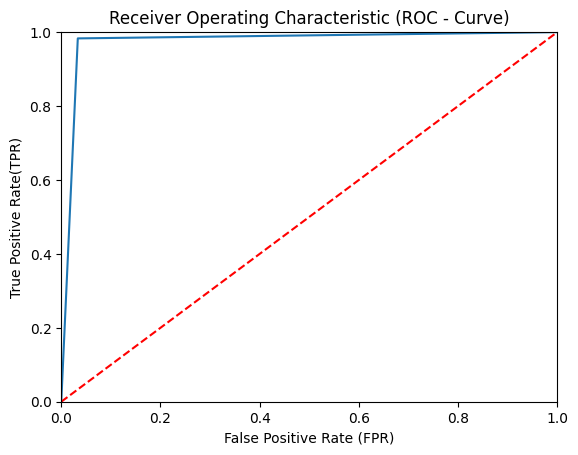

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (ROC - Curve)')
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate(TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.show()

In [ ]:
roc_auc_score(y_test, y_pred)

0.974859028189402

The AUC-Roc is 0.974. This indicates that the model is able to do excellent distinction among the classes.